In [107]:
import pandas as pd 
import seaborn as sns 
import polars as pl 
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [73]:
FILE_PATH = "/home/juan/GitHub/Portfolio/data/credit_risk_dataset.csv"
datos = pd.read_csv(FILE_PATH)
datos

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Limpieza y preparacion de datos

| Feature Name                  | Description                          |
|------------------------------|--------------------------------------|
| person_age                   | Age                                  |
| person_income                | Annual Income                        |
| person_home_ownership        | Home ownership                       |
| person_emp_length            | Employment length (in years)         |
| loan_intent                  | Loan intent                          |
| loan_grade                   | Loan grade                           |
| loan_amnt                    | Loan amount                          |
| loan_int_rate                | Interest rate                        |
| loan_status                  | Loan status (0 is non default, 1 is default) |
| loan_percent_income          | Percent income                       |
| cb_person_default_on_file    | Historical default                   |
| cb_preson_cred_hist_length   | Credit history length                |


In [74]:
num_rows, num_cols = datos.shape
print(f"numero de filas {num_rows}, numero de columnas {num_cols}")
datos.head()

numero de filas 32581, numero de columnas 12


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# 1.1 Conversion de tipos

In [ ]:

columnas_a_convertir = ["loan_grade""", "loan_intent", "person_home_ownership", "loan_status"]

for columna in columnas_a_convertir:
    datos[columna] = datos[columna].astype('category')

print(datos.dtypes)



person_age                       int64
person_income                    int64
person_home_ownership         category
person_emp_length              float64
loan_intent                   category
loan_grade                    category
loan_amnt                        int64
loan_int_rate                  float64
loan_status                   category
loan_percent_income            float64
cb_person_default_on_file       object
cb_person_cred_hist_length       int64
person_age_cat                category
dtype: object


/tmp/ipykernel_246341/730367065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[columna] = datos[columna].astype('category')
/tmp/ipykernel_246341/730367065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[columna] = datos[columna].astype('category')
/tmp/ipykernel_246341/730367065.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [71]:
datos.describe(include = "all")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_cat
count,5.000000,5.000000e+00,5,5.000000,5,5,5.000000,5.000000,5.0,5.000000,5,5.000000,5
unique,NaN,NaN,2,NaN,3,2,NaN,NaN,1.0,NaN,1,NaN,1
top,NaN,NaN,RENT,NaN,EDUCATION,B,NaN,NaN,0.0,NaN,N,NaN,"(120, 145]"
freq,NaN,NaN,3,NaN,2,3,NaN,NaN,5.0,NaN,5,NaN,5
mean,135.600000,1.321601e+06,NaN,5.800000,NaN,NaN,11240.000000,11.884339,NaN,0.112000,NaN,7.400000,NaN
std,11.502174,2.616383e+06,NaN,3.898718,NaN,NaN,8193.167886,1.321908,NaN,0.131034,NaN,9.864076,NaN
min,123.000000,7.800000e+04,NaN,2.000000,NaN,NaN,4800.000000,10.250000,NaN,0.000000,NaN,2.000000,NaN
25%,123.000000,8.000400e+04,NaN,4.000000,NaN,NaN,5000.000000,11.011695,NaN,0.020000,NaN,3.000000,NaN
50%,144.000000,2.000000e+05,NaN,4.000000,NaN,NaN,6000.000000,11.860000,NaN,0.030000,NaN,3.000000,NaN
75%,144.000000,2.500000e+05,NaN,7.000000,NaN,NaN,20000.000000,12.730000,NaN,0.250000,NaN,4.000000,NaN


## Tratamiento de Valores Nulos

In [ ]:
null_counts = datos.isnull().sum()

print(null_counts)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


La variable categorica person_emp_length y loan_int_rate tiene muchos valores nulos, se remplzaran los valores nulos con la media

In [78]:
# ! grafica de person_emp_length 

mean_person_emp_length = datos["person_emp_length"].mean()


# Crear un DataFrame de ejemplo
datos["person_emp_length"].fillna(mean_person_emp_length, inplace=True)

mean_loan_int_rate = datos["loan_int_rate"].mean()

datos["loan_int_rate"].fillna(mean_loan_int_rate, inplace=True)


/tmp/ipykernel_246341/3831740831.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos["person_emp_length"].fillna(mean_person_emp_length, inplace=True)
/tmp/ipykernel_246341/3831740831.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

## Datos atipicos o mal registrados

In [68]:
from scipy.stats import zscore

z_scores = zscore(datos['person_age'])
outliers = datos[abs(z_scores) > 8]  # Valores con z-score mayor a 3
outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_cat


Hay personas de mas de 100 años pidiendo prestamos, lo que puede indicar que hay errores en los registros, estos se eliminaran.

In [79]:
datos = datos[datos["person_age"] <= 100]

## Analisis Descriptivo

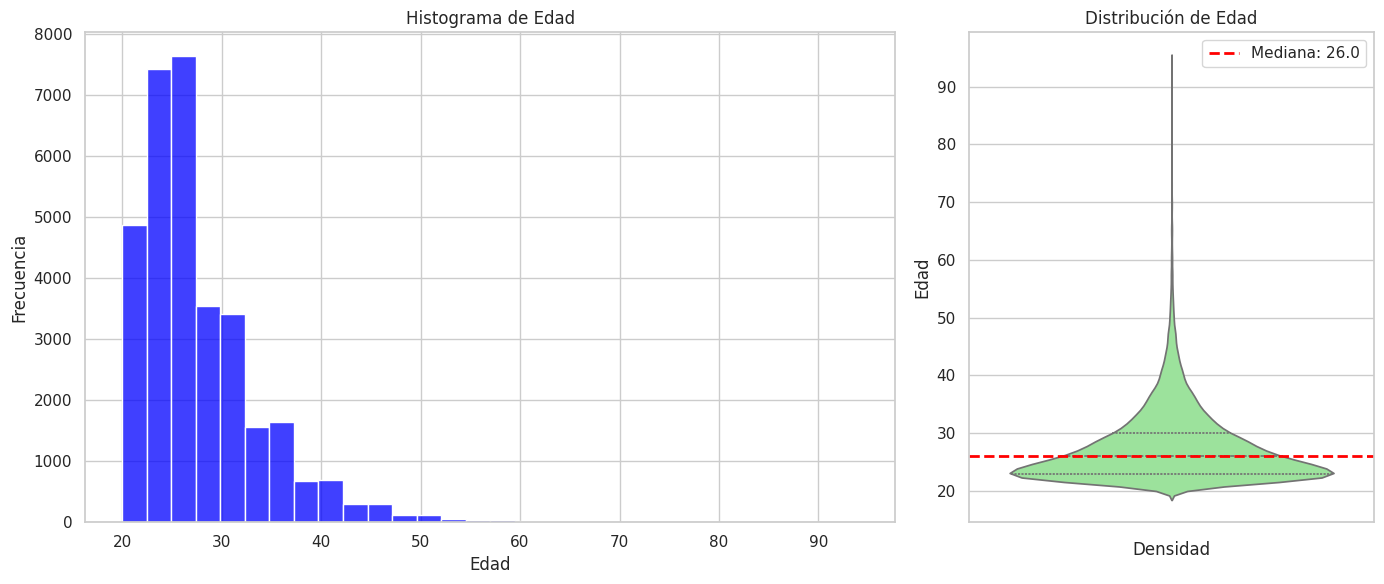

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

sns.histplot(data=datos, x='person_age', bins=30, ax=axes[0], color="blue")
axes[0].set_title('Histograma de Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True)

sns.violinplot(data=datos, y='person_age', ax=axes[1], color="lightgreen", inner='quartile')
axes[1].set_title('Distribución de Edad')
axes[1].set_xlabel('Densidad')
axes[1].set_ylabel('Edad')

mediana = datos['person_age'].median()
axes[1].axhline(y=mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

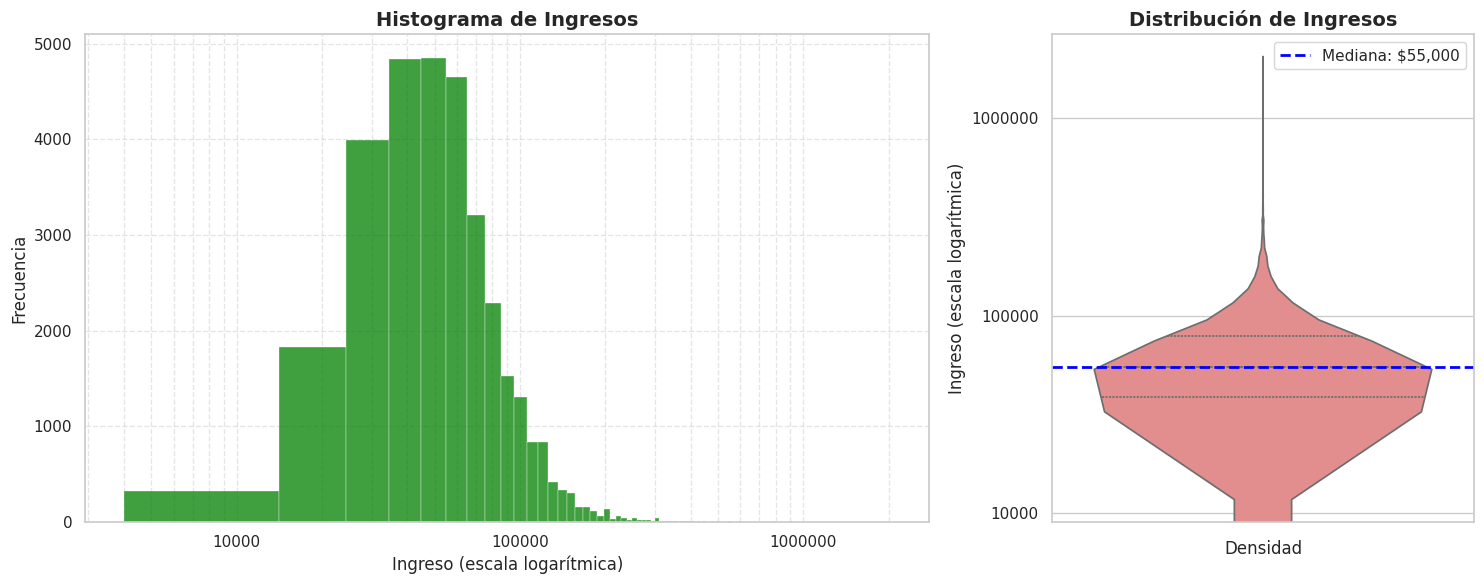

In [102]:
from matplotlib.ticker import LogLocator, ScalarFormatter
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6), gridspec_kw={'width_ratios': [2, 1]})

sns.histplot(data=datos, x='person_income', bins=200, color="green", ax=axes[0])

axes[0].set_xscale('log')

formatter = ScalarFormatter()
formatter.set_scientific(False)
axes[0].xaxis.set_major_formatter(formatter)

axes[0].xaxis.set_major_locator(LogLocator(base=10.0, numticks=15))

axes[0].set_title('Histograma de Ingresos', fontsize=14, weight='bold')
axes[0].set_xlabel('Ingreso (escala logarítmica)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].grid(True, which='both', linestyle='--', alpha=0.5)

sns.violinplot(data=datos, y='person_income', ax=axes[1], color="lightcoral", inner='quartile')

axes[1].set_yscale('log')

formatter_y = ScalarFormatter()
formatter_y.set_scientific(False)
axes[1].yaxis.set_major_formatter(formatter_y)

axes[1].yaxis.set_major_locator(LogLocator(base=10.0, numticks=15))

axes[1].set_title('Distribución de Ingresos', fontsize=14, weight='bold')
axes[1].set_xlabel('Densidad', fontsize=12)
axes[1].set_ylabel('Ingreso (escala logarítmica)', fontsize=12)

mediana = datos['person_income'].median()
axes[1].axhline(y=mediana, color='blue', linestyle='--', linewidth=2, label=f'Mediana: ${mediana:,.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

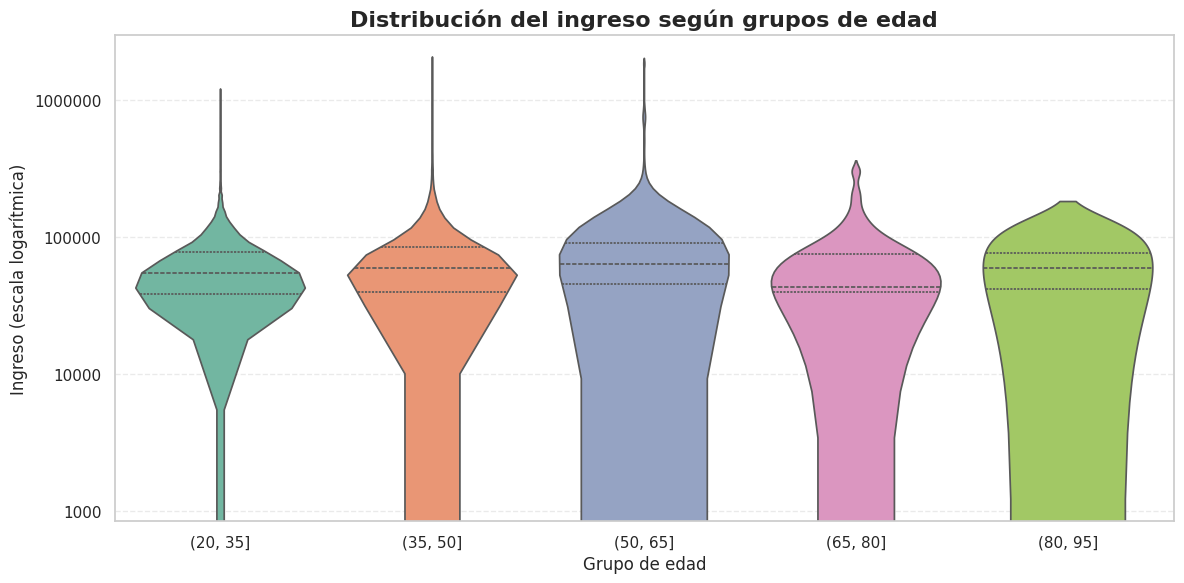

In [103]:
min_age = int(datos['person_age'].min())
max_age = int(datos['person_age'].max()) + 1
bins = pd.interval_range(start=min_age, end=max_age, periods=5)

datos.loc[:, 'person_age_cat'] = pd.cut(datos['person_age'], bins=bins)

sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    data=datos,
    x='person_age_cat',
    y='person_income',
    hue='person_age_cat',
    legend=False,
    density_norm='width',
    inner='quartile',
    palette='Set2'
)

ax.set_yscale('log')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')

plt.title('Distribución del ingreso según grupos de edad', fontsize=16, weight='bold')
plt.xlabel('Grupo de edad', fontsize=12)
plt.ylabel('Ingreso (escala logarítmica)', fontsize=12)

plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

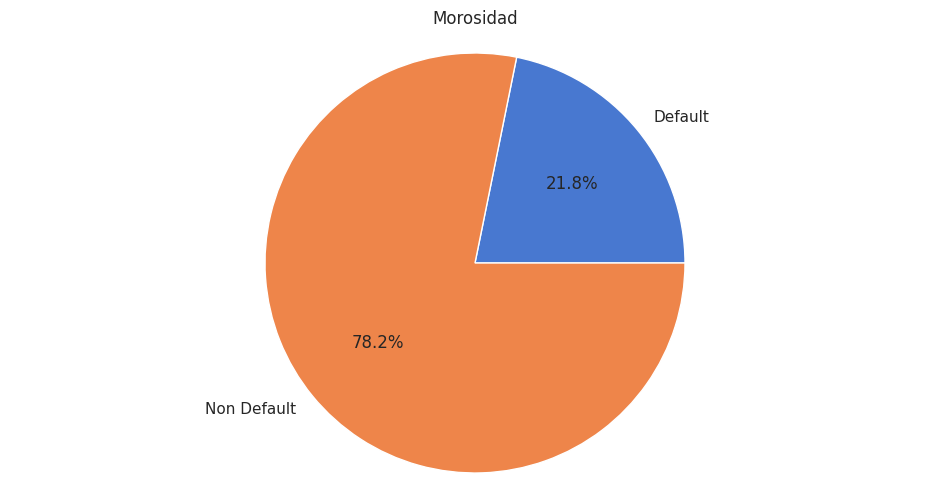

In [105]:
count_default = (datos["loan_status"] == 1).sum()
count_not_default = (datos["loan_status"] == 0).sum()


# MÉTODO 1: Gráfico de pastel básico
plt.figure(figsize=(12, 6))

# Datos de ejemplo
categorias = ['Default', 'Non Default']
valores = [count_default, count_not_default]

plt.pie(valores, labels=categorias, autopct='%1.1f%%')
plt.title('Morosidad')
plt.axis('equal')  # Para que el círculo sea perfecto
plt.show()


/tmp/ipykernel_246341/3556025019.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos,x='loan_grade',y='loan_int_rate',palette='rainbow')


<Axes: xlabel='loan_grade', ylabel='loan_int_rate'>

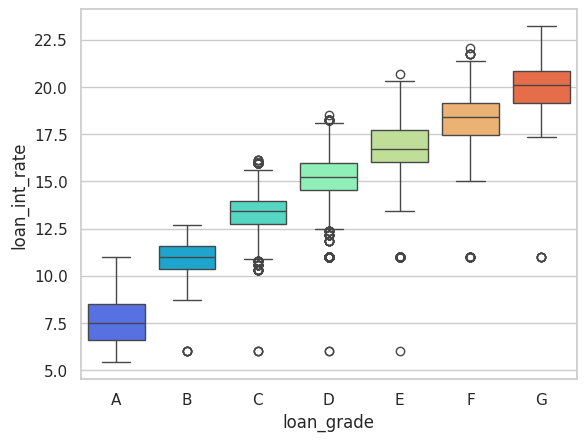

In [142]:
sns.boxplot(data=datos,x='loan_grade',y='loan_int_rate',palette='rainbow')

# Modelos de Clasificacion

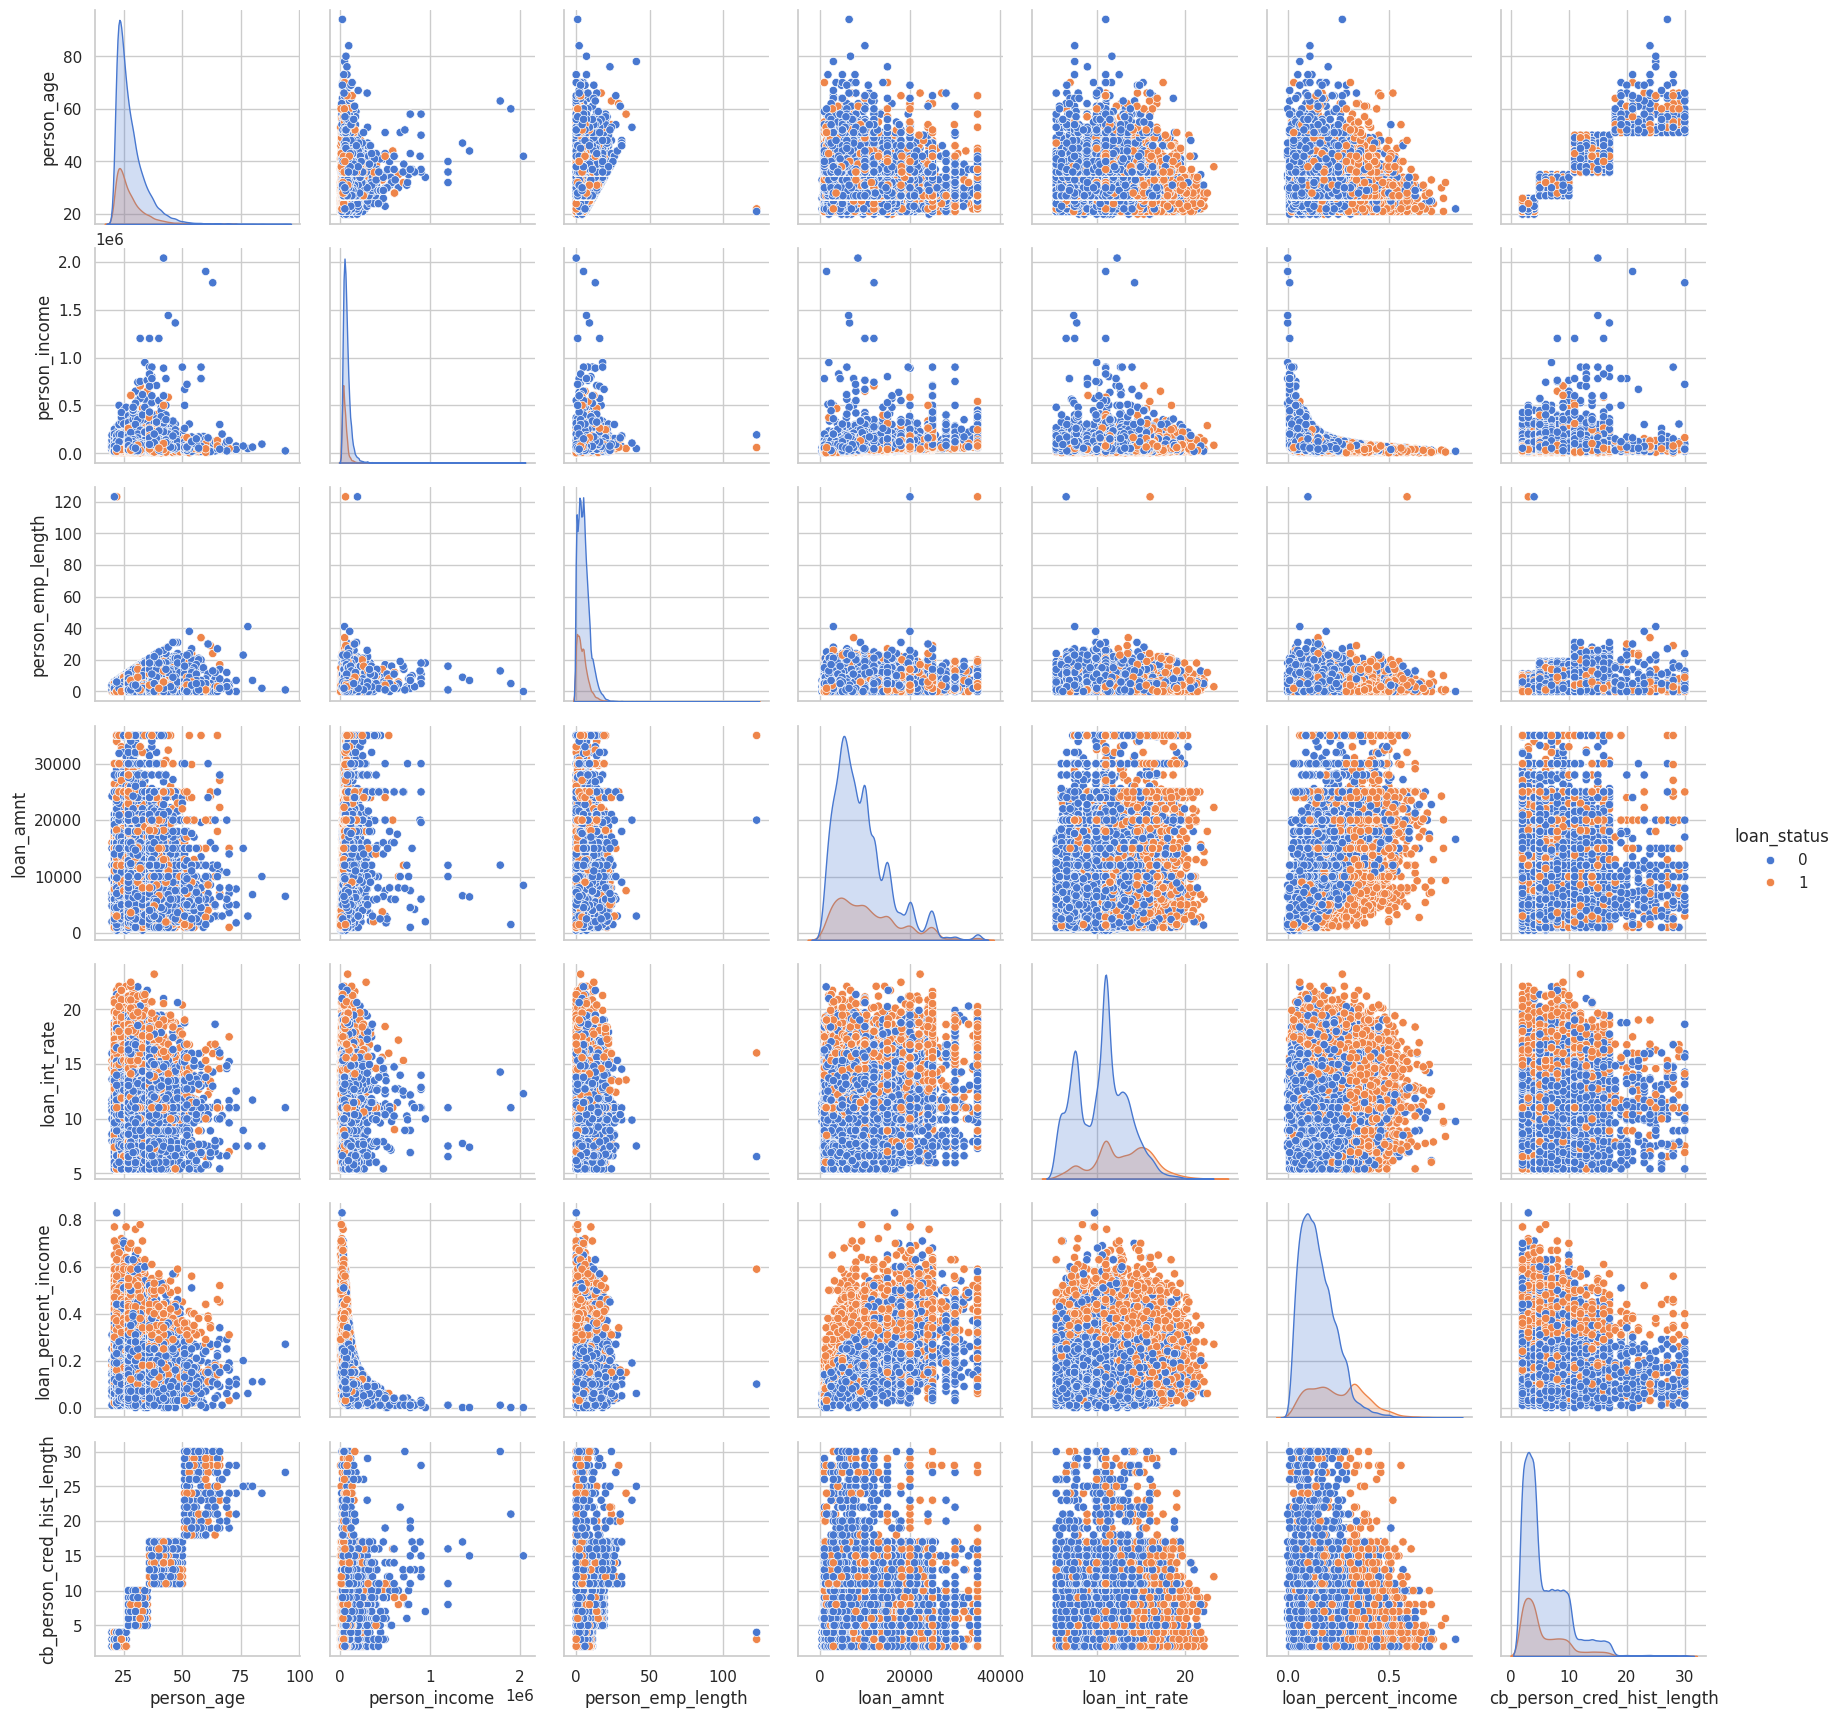

In [141]:
## Regresion Logistica
sns.pairplot(datos,hue='loan_status')


## Regresion Logistica

In [162]:
# ! Usamos validacion cruzada
X = datos.drop("loan_status", axis=1)
y = datos["loan_status"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Reemplaza caracteres especiales en los nombres de columnas

import re

X_train.columns = [re.sub(r'[^\w_]', '_', col) for col in X_train.columns]
X_test.columns = [re.sub(r'[^\w_]', '_', col) for col in X_test.columns]

In [116]:
# ! Entrenamos el modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

/home/juan/GitHub/Portfolio/enviroment/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
# Predicciones
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para ROC

# Reporte de métricas
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))   


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      5096
           1       0.75      0.43      0.55      1420

    accuracy                           0.84      6516
   macro avg       0.81      0.69      0.73      6516
weighted avg       0.84      0.84      0.83      6516

Matriz de confusión:
 [[4897  199]
 [ 811  609]]
AUC: 0.8429414398478786


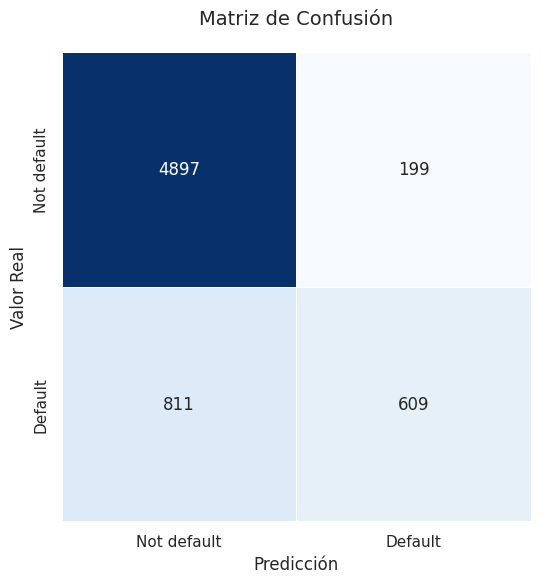

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True,          
            fmt='d',             
            cmap='Blues',         
            square=True,         
            linewidths=0.5,      
            cbar=False,          
            xticklabels=['Not default', 'Default'],
            yticklabels=['Not default', 'Default'])

plt.title('Matriz de Confusión', fontsize=14, pad=20)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# CÓDIGO SIMPLE - Copia y pega:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from scipy import stats

# 1. Método F-Score (más confiable)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

# Crear DataFrame con resultados
feature_names = X_train.columns

results_df = pd.DataFrame({
    'Variable': feature_names,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_,
    'Significativo': selector.pvalues_ < 0.05
}).sort_values('F_Score', ascending=False)

print("Variables significativas (p < 0.05):")
sig_vars = results_df[results_df['Significativo']]
print(sig_vars[['Variable', 'P_Value']])

Variables significativas (p < 0.05):
                       Variable        P_Value
5           loan_percent_income   0.000000e+00
4                 loan_int_rate   0.000000e+00
17                 loan_grade_D   0.000000e+00
9    person_home_ownership_RENT   0.000000e+00
18                 loan_grade_E  7.309891e-198
21  cb_person_default_on_file_Y  4.263535e-192
1                 person_income  1.175715e-163
3                     loan_amnt   4.553133e-72
8     person_home_ownership_OWN   3.798681e-62
19                 loan_grade_F   1.351746e-57
15                 loan_grade_B   4.171383e-55
20                 loan_grade_G   3.651613e-48
2             person_emp_length   2.344218e-42
14          loan_intent_VENTURE   1.791673e-34
10        loan_intent_EDUCATION   9.356433e-22
12          loan_intent_MEDICAL   2.168817e-17
11  loan_intent_HOMEIMPROVEMENT   1.272535e-08
13         loan_intent_PERSONAL   9.820079e-04
0                    person_age   2.085345e-03
7   person_home_ownersh

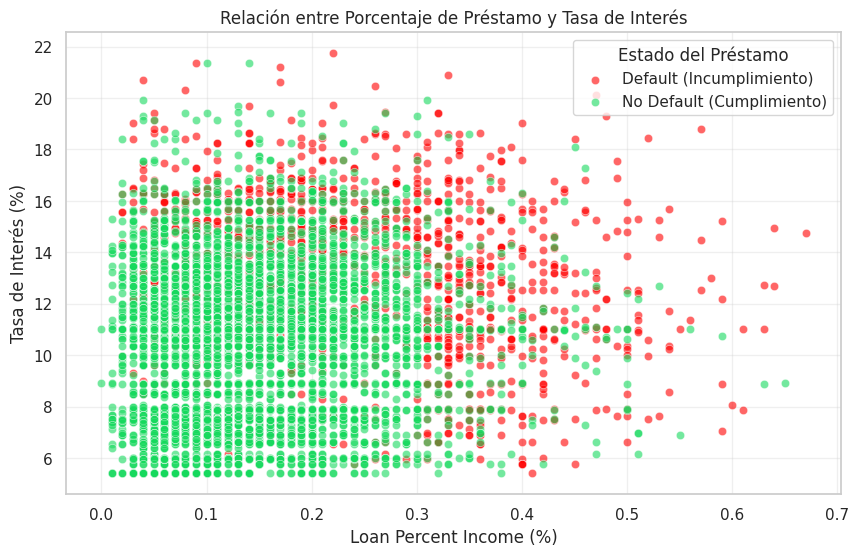

In [140]:
# Cambiar esta línea:
datos_grafica_1_RL = X_test[["loan_percent_income", "loan_int_rate"]]

# Por esta:
datos_grafica_1_RL = X_test[["loan_percent_income", "loan_int_rate"]].copy()

# El resto del código queda igual
datos_grafica_1_RL["loan_status"] = y_test

datos_default_G1RL = datos_grafica_1_RL[datos_grafica_1_RL["loan_status"] == 1]
datos_not_default_G1RL = datos_grafica_1_RL[datos_grafica_1_RL["loan_status"] == 0]

# Crear la figura con tamaño específico
plt.figure(figsize=(10, 6))

# Puntos de un solo color con transparencia y etiquetas para la leyenda
sns.scatterplot(data=datos_default_G1RL, x='loan_percent_income', y='loan_int_rate', 
                color='red', alpha=0.6, label='Default (Incumplimiento)')

sns.scatterplot(data=datos_not_default_G1RL, x='loan_percent_income', y='loan_int_rate', 
                color="#16D95D", alpha=0.6, label='No Default (Cumplimiento)')

plt.title('Relación entre Porcentaje de Préstamo y Tasa de Interés')
plt.xlabel('Loan Percent Income (%)')
plt.ylabel('Tasa de Interés (%)')

# Añadir la leyenda
plt.legend(title='Estado del Préstamo', loc='upper right')

# Opcional: añadir grid para mejor lectura
plt.grid(True, alpha=0.3)

plt.show()

## SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='dlf', C=1.0)

svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [149]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5096
           1       0.00      0.00      0.00      1420

    accuracy                           0.78      6516
   macro avg       0.39      0.50      0.44      6516
weighted avg       0.61      0.78      0.69      6516

Matriz de Confusión:
[[5096    0]
 [1420    0]]


/home/juan/GitHub/Portfolio/enviroment/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/juan/GitHub/Portfolio/enviroment/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/juan/GitHub/Portfolio/enviroment/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

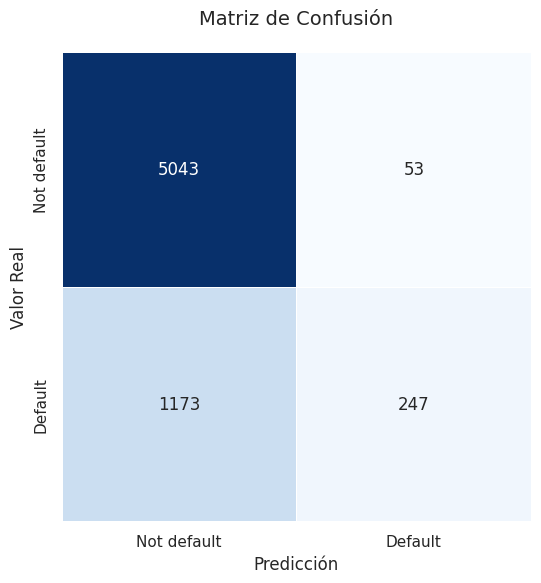

In [147]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, 
            annot=True,          
            fmt='d',             
            cmap='Blues',         
            square=True,         
            linewidths=0.5,      
            cbar=False,          
            xticklabels=['Not default', 'Default'],
            yticklabels=['Not default', 'Default'])

plt.title('Matriz de Confusión', fontsize=14, pad=20)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.tight_layout()
plt.show()

In [152]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7,        
                                weights='uniform',     
                                algorithm='auto',      
                                metric='euclidean')   

knn_model.fit(X_test, y_test)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred = knn_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(6516,))

In [155]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5096
           1       0.79      0.52      0.63      1420

    accuracy                           0.87      6516
   macro avg       0.83      0.74      0.77      6516
weighted avg       0.86      0.87      0.85      6516

Matriz de Confusión:
[[4898  198]
 [ 680  740]]


## Gradient Boosting

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 



# Modelo GBM
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5096
           1       0.92      0.70      0.79      1420

    accuracy                           0.92      6516
   macro avg       0.92      0.84      0.87      6516
weighted avg       0.92      0.92      0.92      6516



In [ ]:
from lightgbm import LGBMClassifier


# Entrenar
model = LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5096
           1       0.97      0.72      0.83      1420

    accuracy                           0.93      6516
   macro avg       0.95      0.86      0.89      6516
weighted avg       0.94      0.93      0.93      6516

